# Plot the age of all images using metadata

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
df = pd.read_csv('years.csv')

In [3]:
df['year'] = [x[:4] for x in df['date']]
df_grouped = df.groupby('year').count()
df_grouped.drop(labels=['lat','long'], axis=1, inplace=True)

## Histogram of Images by Year Taken

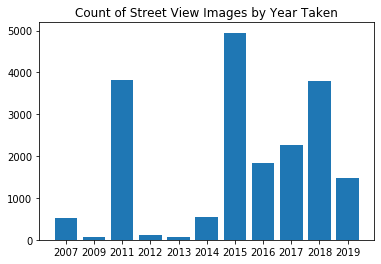

In [4]:
plt.bar(df_grouped.index, df_grouped.date)
plt.title('Count of Street View Images by Year Taken')
plt.savefig('Histogram_years.png')

## Geovisualization of Image Age

The shapefile of all streets in Milwaukee is downloaded from here: https://catalog.data.gov/dataset/tiger-line-shapefile-2015-county-milwaukee-county-wi-all-roads-county-based-shapefile
<br>A great tutorial for using GeoPandas is here: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [5]:
geometry = [Point(xy) for xy in zip(df["long"], df["lat"])]

In [6]:
geo_df = gpd.GeoDataFrame(df, crs = {'init': 'epsg:4326'}, geometry=geometry)
geo_df.head()

,date,lat,long,year,geometry
0,2019-06,42.957503,-87.938367,2019,POINT (-87.93836739674397 42.95750301464003)
1,2016-10,42.899259,-88.047098,2016,POINT (-88.0470983 42.8992587)
2,2011-08,42.921614,-87.881025,2011,POINT (-87.88102546135187 42.9216140449554)
3,2018-09,43.050123,-88.040263,2018,POINT (-88.04026273617674 43.05012250060103)
4,2019-05,42.959289,-88.026043,2019,POINT (-88.0260425 42.9592887)


In [8]:
street_map = gpd.read_file('MKE_Roads/tl_2015_55079_roads.shp')

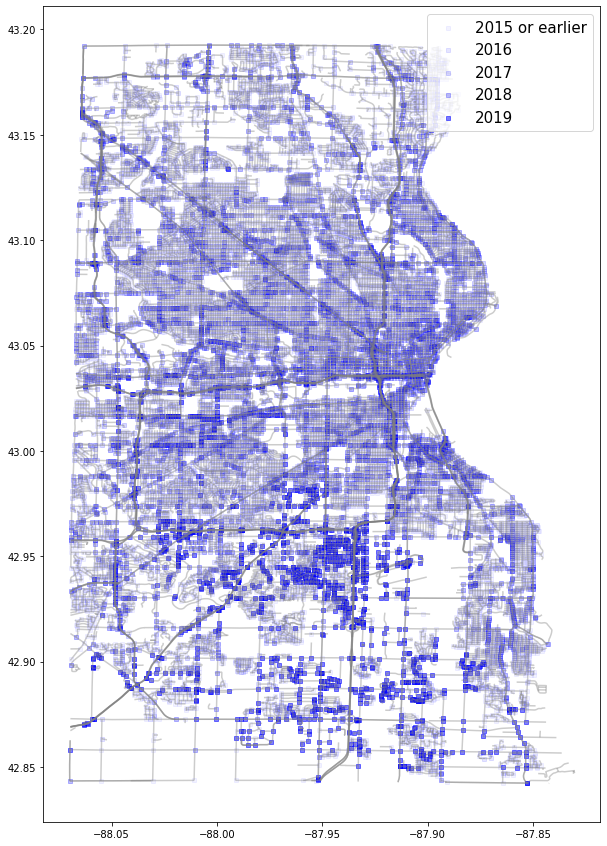

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[(geo_df['year']<='2015')].plot(ax=ax, markersize=10, color='blue', alpha=0.05, marker="s", label = '2015 or earlier')
geo_df[(geo_df['year']=='2016')].plot(ax=ax, markersize=10, color='blue', alpha=0.1, marker="s", label = '2016')
geo_df[(geo_df['year']=='2017')].plot(ax=ax, markersize=10, color='blue', alpha=0.15, marker="s", label = '2017')
geo_df[(geo_df['year']=='2018')].plot(ax=ax, markersize=10, color='blue', alpha=0.25, marker="s", label = '2018')
geo_df[(geo_df['year']=='2019')].plot(ax=ax, markersize=10, color='blue', alpha=0.5, marker="s", label = '2019')
plt.legend(prop={'size':15}, loc=1)
plt.savefig('Age_of_Photos.png')

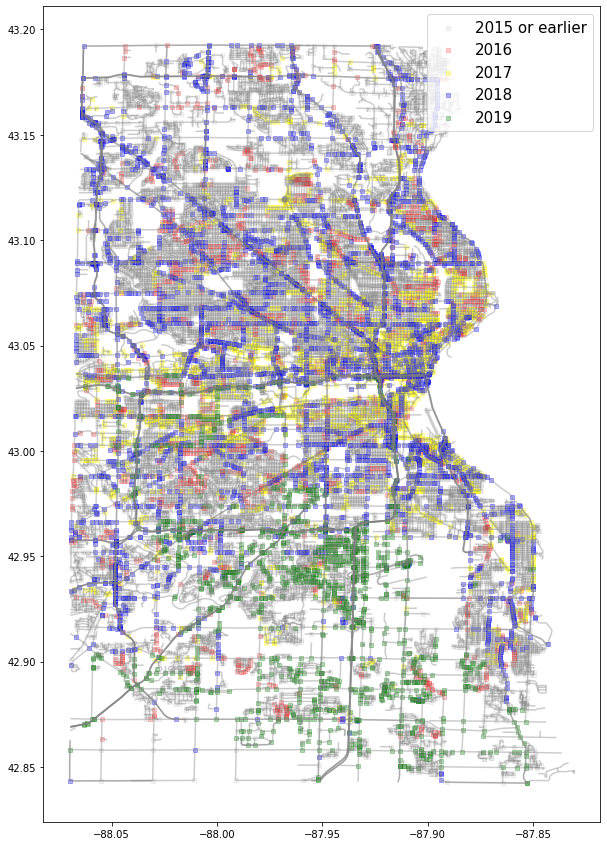

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[(geo_df['year']<='2015')].plot(ax=ax, markersize=10, color='grey', alpha=0.1, marker="s", label = '2015 or earlier')
geo_df[(geo_df['year']=='2016')].plot(ax=ax, markersize=10, color='red', alpha=0.2, marker="s", label = '2016')
geo_df[(geo_df['year']=='2017')].plot(ax=ax, markersize=10, color='yellow', alpha=0.3, marker="s", label = '2017')
geo_df[(geo_df['year']=='2018')].plot(ax=ax, markersize=10, color='blue', alpha=0.3, marker="s", label = '2018')
geo_df[(geo_df['year']=='2019')].plot(ax=ax, markersize=10, color='green', alpha=0.3, marker="s", label = '2019')
plt.legend(prop={'size':15}, loc=1)
plt.savefig('Age_of_Photos_Colors.png')